# Машинное обучение

ML - решает следующую задачу

Требуется подогнать заданный набор точек, данных под соответствующую функцию (отображение входа на выход), которая улавливает важные сигналы в данных и игнорирует помехи, а затем убедиться, что на новых данных функция работает хорошо

Обучение с учителем (supervised learning) - моделирует отношение между признаками и метками. Такие модели служат для предсказания меток на основе обучающих маркированных данных. После построения модели можно использовать ее для присвоения меток новым ранее неизвестным данным

1. Задачи классификации (метки - дискретные: два или более)

2. Задачи регрессии (метки/результат: непрерывные величины)

Обучение без учителя (unsupervised learning) - моделирование признаков без меток. Такие модели служат для выявления структуры немаркированных данных.

1. Задача кластеризации (выделяет отдельные группы данных)

2. Понижение размерности (поиск более сжатого представления данных)

Существуют методы частичного обучения (semi-supervised learning). Не все данные промаркированы.

Методы обучения с подкреплением (reinforcement learning). Система обучения улучшает свои характеристики на основе взаимодействия (обратной связи) со средой. При этом взаимодействии система получает сигналы (функции наград), которые несут в себе информацию насколько хорошо/плохо система решила задачу (с точки зрения среды). Итоговая награда не станет максимальной.

In [118]:
import seaborn as sns

In [119]:
iris = sns.load_dataset('iris')
print(iris.head())
print(type(iris))
print(type(iris.values))
print(iris.values.shape)
print(iris.columns)
print(iris.index)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
RangeIndex(start=0, stop=150, step=1)


Строки - отдельные объекты - образцы (sample)

Столбцы - признаки (features) - соответствуют конкретным наблюдениям

Матрицы признаков (features matrix) размер [число образцов x число признаков]

Целевой массив/массив меток (targets) - одномерный массив [1 x число образцов] - данные, которые мы хотим предсказать на основе имеющихся данных

Зависимые (метка) и независимые переменные (признаки)

# Процесс построения системы машинного обучения:

1. Предварительная обработка

- На вход поступают необработанные данные и метки

- Происходит выбор признаков, масштабирование признаков

- Пониение размерности 

- Выборка образцов

- На выход набор данных: обучающий и тестовый

2. Обучение

- Выбор модели

- Перекрестная проверка

- Метрики эффективности

- Оптимизация гиперпараметров. Параметры, которые получаются не из данных, а являются характеристиками модели

3. Оценка и формирование финальной модели

4. Прогнозирование (использование модели)

# SciKit-learn

1. Выбираем класс модели

2. Устанавливаем гиперпараметры модели

3. Создаем матрицу признаков и целевой массив

4. Обучение модели fit()

5. Применять модель к новым данным

- predict() (с учителем)

- predict() или transform() (без учителя)

# Обучение с учителем: Линейная регрессия

Простая линейная регрессия

y = ax + b

In [120]:
import matplotlib.pyplot as plt
import numpy as np

(50,)
(50,)
2.0272088103606944
-0.998577085553201


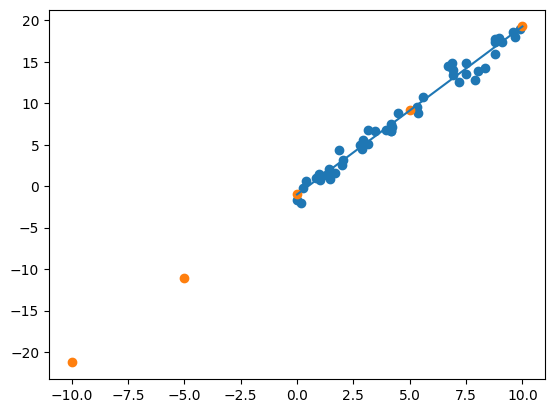

In [121]:
# First step

np.random.seed(1)
x = 10 * np.random.rand(50)
y = 2 * x - 1 + np.random.randn(50)

plt.scatter(x, y)

# Second step

# 1. Выбираем класс модели
from sklearn.linear_model import LinearRegression

# 2. Устанавливаем гиперпараметры модели
model = LinearRegression()

# 3. Создаем матрицу признаков и целевой массив
print(x.shape)
print(y.shape)

X = x[:, np.newaxis]

# 4. Обучение модели fit()
model.fit(X, y)

print(model.coef_[0])
print(model.intercept_)

x_ = np.linspace(0, 10, 30)
y_ = model.coef_[0] * x_ + model.intercept_

plt.plot(x_, y_)

# 5. Применять модель к новым данным
xfit = np.linspace(-10, 10, 5)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(xfit, yfit)